# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
BC = pd.read_csv('Cancer.csv')
BC.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [3]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
BC.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [5]:
BC.groupby(["Class"]).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


In [6]:
BC["Class"].mode()

0    2
dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [7]:
BC.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

##### No missing values have been found in any of the columns .So checking for special characters if any  in any of the columns.

In [8]:
print(BC['Bare Nuclei'].unique())
print (BC['Bare Nuclei'].value_counts())
print (BC["ClumpThickness"].unique())
print (BC['ClumpThickness'].value_counts())
print (BC["Cell Size"].unique())
print (BC['Cell Size'].value_counts())
print (BC["Cell Shape"].unique())
print (BC['Cell Shape'].value_counts())
print (BC["Marginal Adhesion"].unique())
print (BC["Marginal Adhesion"].value_counts())
print (BC["Single Epithelial Cell Size"].unique())
print (BC["Single Epithelial Cell Size"].value_counts())
print (BC["Normal Nucleoli"].unique())
print (BC["Normal Nucleoli"].value_counts())
print (BC["Bland Chromatin"].unique())
print (BC["Bland Chromatin"].value_counts())
print (BC["Mitoses"].unique())
print (BC['Cell Shape'].value_counts())
print (BC["Class"].unique())
print (BC['Class'].value_counts())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64
[ 5  3  6  4  8  1  2  7 10  9]
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: ClumpThickness, dtype: int64
[ 1  4  8 10  2  3  7  5  6  9]
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Cell Size, dtype: int64
[ 1  4  8 10  2  3  5  6  7  9]
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Cell Shape, dtype: int64
[ 1  5  3  8 10  4  6  2  9  7]
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64
[ 2  7  3  1  6  4  5  8 10  9]
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single Epit

###### since there are 16 special characters are present in Bare Nuclei column ,it is not possible to change type of this.So replacing the same with mode or top value .

In [9]:
print (BC["Bare Nuclei"].mode())
BC['Bare Nuclei'].describe(include='all')

0    1
dtype: object


count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

###### It can be seen that value '1' have frequency of 402 and is mode.So replacing the '?' with 1.

In [10]:
BC['Bare Nuclei'].replace('?',1,inplace=True)

In [11]:
print('Type of Bare Nuclei =',BC['Bare Nuclei'].dtypes,'before conversion')
BC['Bare Nuclei']=BC['Bare Nuclei'].astype(int)
print('Type of Bare Nuclei =',BC['Bare Nuclei'].dtypes,'after conversion')

Type of Bare Nuclei = object before conversion
Type of Bare Nuclei = int32 after conversion


##### Checking duplicate data

In [12]:
BC[BC.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [13]:
BC.drop_duplicates(subset=None, keep='first', inplace = True)

In [14]:
#when we remove data from the dataframe, the index doesn't get changed. We need to reset it

BC.reset_index(drop=True, inplace=True)

In [15]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           690 non-null    int64
 1   ClumpThickness               690 non-null    int64
 2   Cell Size                    690 non-null    int64
 3   Cell Shape                   690 non-null    int64
 4   Marginal Adhesion            690 non-null    int64
 5   Single Epithelial Cell Size  690 non-null    int64
 6   Bare Nuclei                  690 non-null    int32
 7   Normal Nucleoli              690 non-null    int64
 8   Bland Chromatin              690 non-null    int64
 9   Mitoses                      690 non-null    int64
 10  Class                        690 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 56.7 KB


In [16]:
BC.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

###### Since ID is redundant feature as of now  , dropping it for further analysis.

In [17]:
BCnew = BC[['Class','ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']]

In [18]:
BCnew

,Class,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
685,2,3,1,1,1,3,2,1,1,1
686,2,2,1,1,1,2,1,1,1,1
687,4,5,10,10,3,7,3,8,10,2
688,4,4,8,6,4,3,4,10,6,1


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [19]:
# Check for correlation of variables

In [20]:
corr= BCnew.corr()
corr

,Class,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,1.000000,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947
ClumpThickness,0.716812,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196
Cell Size,0.817586,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918
Cell Shape,0.817551,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435
Marginal Adhesion,0.701175,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008
Single Epithelial Cell Size,0.681063,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517
Bare Nuclei,0.816655,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823
Normal Nucleoli,0.756736,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769
Bland Chromatin,0.715363,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490
Mitoses,0.423947,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000


##### Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin 

###### Target variable shows high correlation with most of these variables

###### correlation of the independant variables with target variables

In [21]:
cor_target = abs(corr["Class"])
cor_target

Class                          1.000000
ClumpThickness                 0.716812
Cell Size                      0.817586
Cell Shape                     0.817551
Marginal Adhesion              0.701175
Single Epithelial Cell Size    0.681063
Bare Nuclei                    0.816655
Normal Nucleoli                0.756736
Bland Chromatin                0.715363
Mitoses                        0.423947
Name: Class, dtype: float64

##### selecting correlation between -0.1 to 0.1

In [22]:
rf = cor_target[(cor_target >-0.1) & (cor_target < 0.1)]
rf

Series([], Name: Class, dtype: float64)

##### as there are no features in the range of -0.1 to 0.1, not dropping anything at this point

In [23]:
#pairplot

In [91]:
sns.distributions._has_statsmodels = False

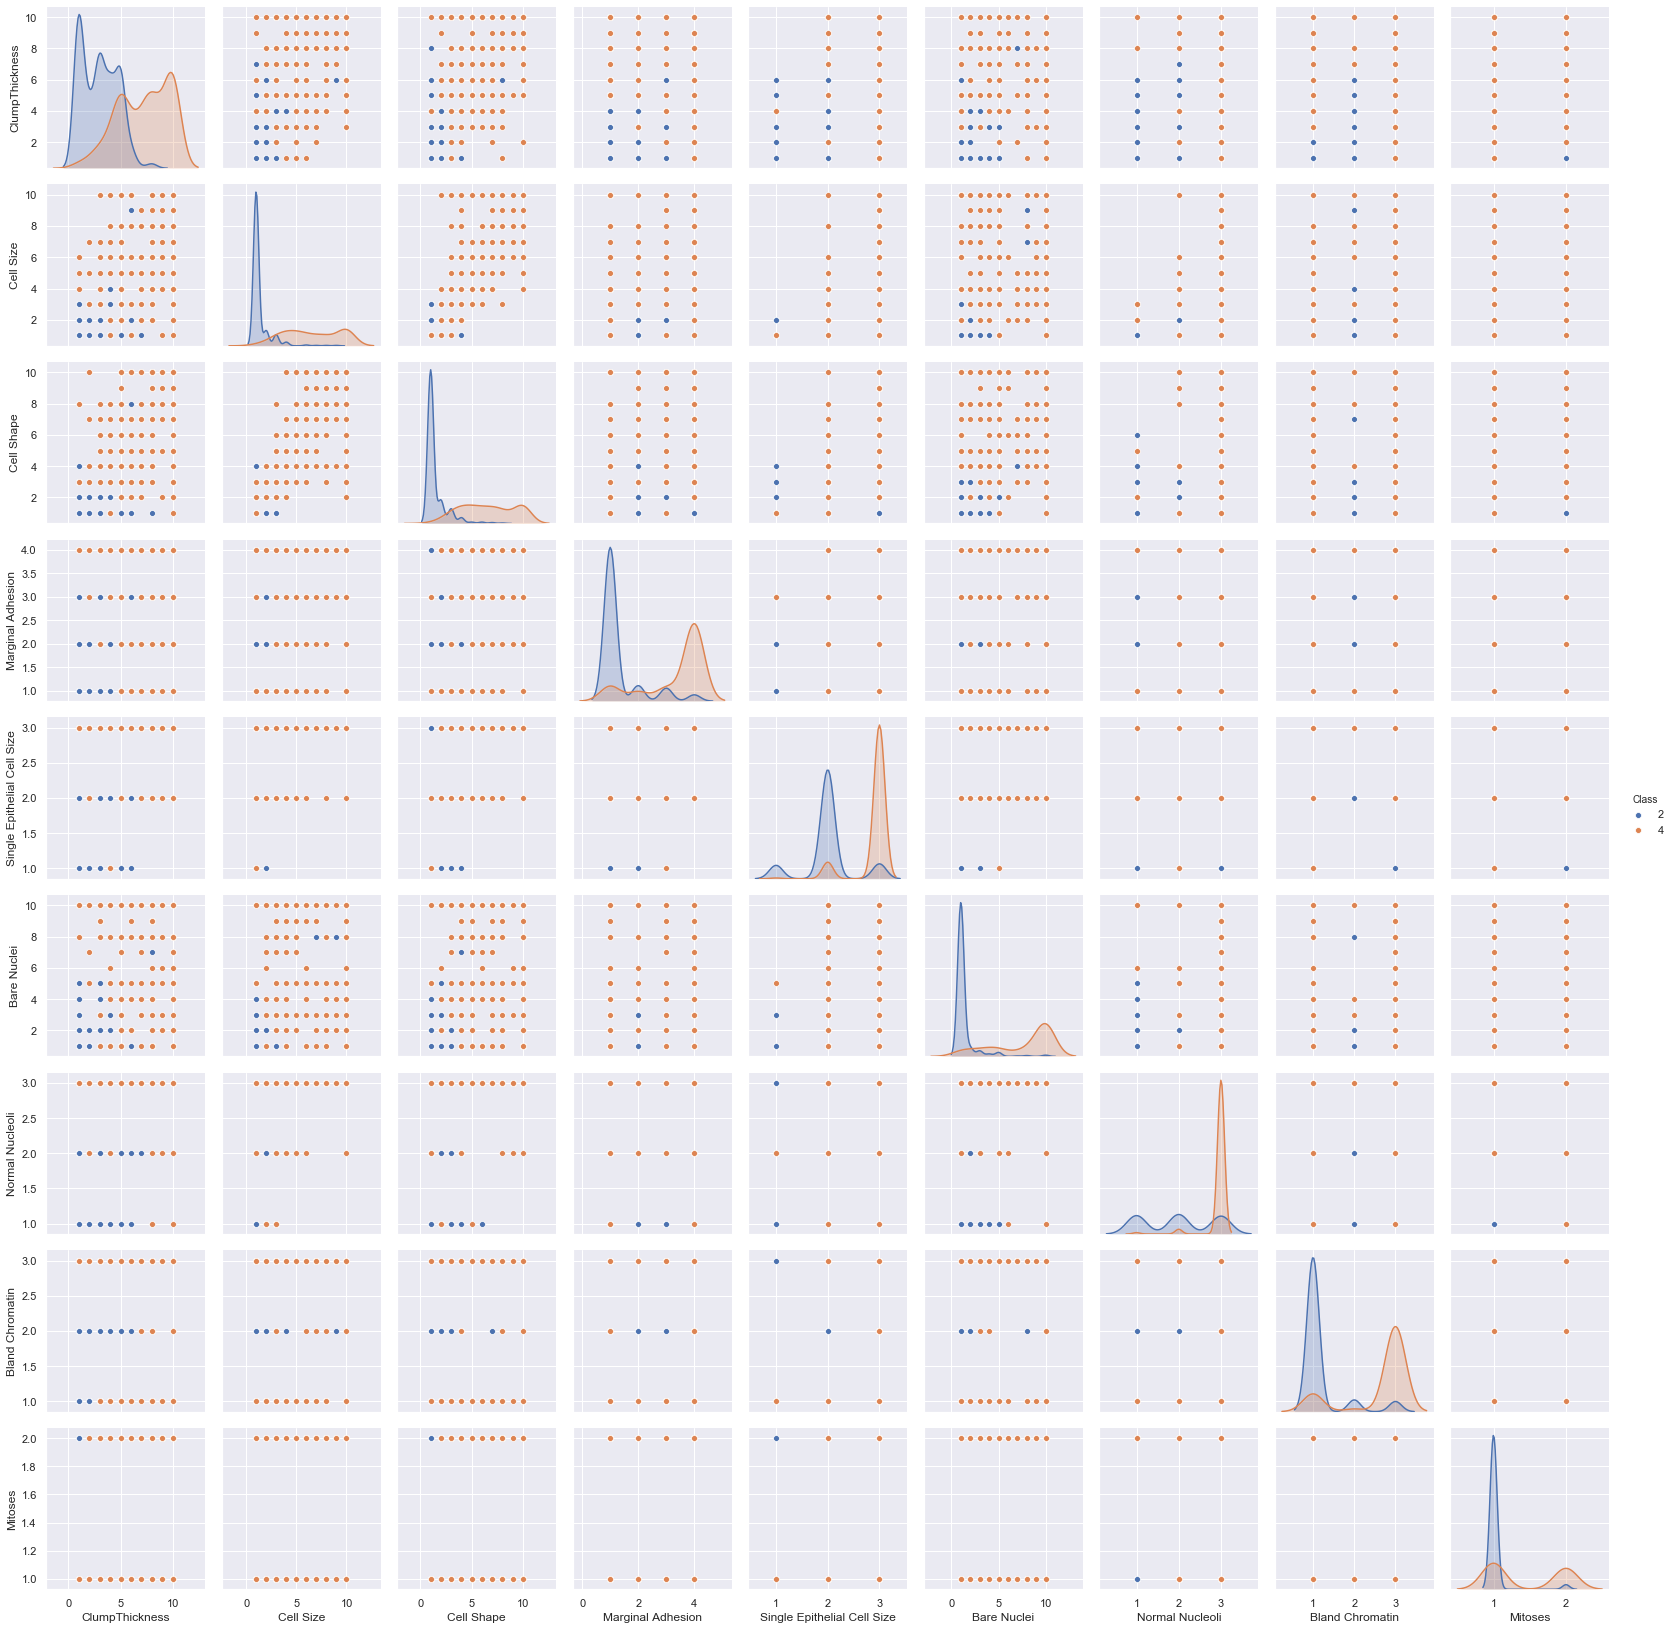

In [92]:
sns.pairplot(BCnew,hue = 'Class',diag_kind = 'kde')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

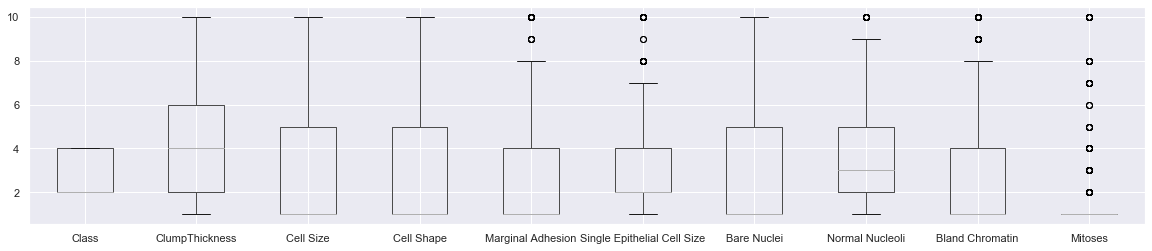

In [25]:
BCnew.boxplot(figsize=(20,4))

In [26]:
pd.crosstab(BCnew['Mitoses'],BCnew['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [27]:
BCnew['Mitoses'] = np.where(BCnew['Mitoses']>4, 4, BCnew['Mitoses'])

In [28]:
BCnew['Mitoses'] = np.where(BCnew['Mitoses']>2, 2, BCnew['Mitoses'])

In [29]:
pd.crosstab(BCnew['Mitoses'],BCnew['Class'])

Class,2,4
Mitoses,,
1,439,132
2,13,106


In [30]:
pd.crosstab(BCnew['Bland Chromatin'],BCnew['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [31]:
BCnew['Bland Chromatin'] = np.where(BCnew['Bland Chromatin']>3, 3, BCnew['Bland Chromatin'])

In [32]:
pd.crosstab(BCnew['Bland Chromatin'],BCnew['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,26,192


In [33]:
pd.crosstab(BCnew['Normal Nucleoli'],BCnew['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [34]:
BCnew['Normal Nucleoli'] = np.where(BCnew['Normal Nucleoli']>3, 3, BCnew['Normal Nucleoli'])

In [35]:
pd.crosstab(BCnew['Normal Nucleoli'],BCnew['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,145,229


In [36]:
pd.crosstab(BCnew['Single Epithelial Cell Size'],BCnew['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [37]:
BCnew['Single Epithelial Cell Size'] = np.where(BCnew['Single Epithelial Cell Size']>3, 3, BCnew['Single Epithelial Cell Size'])

In [38]:
pd.crosstab(BCnew['Single Epithelial Cell Size'],BCnew['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,49,214


In [39]:
pd.crosstab(BCnew['Marginal Adhesion'],BCnew['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [40]:
BCnew['Marginal Adhesion'] = np.where(BCnew['Marginal Adhesion']>4, 4, BCnew['Marginal Adhesion'])

In [41]:
pd.crosstab(BCnew['Marginal Adhesion'],BCnew['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


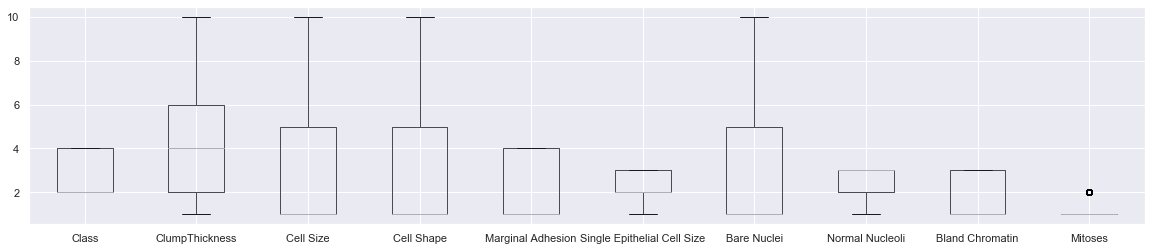

In [42]:
BCnew.boxplot(figsize=(20,4))

###### We could see most of the outliers are now removed.

In [43]:
BC2 = BCnew.drop(["Class"], axis = 1)

In [44]:
from scipy.stats import zscore

In [45]:
BC2.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,3,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,3,1
4,4,1,1,3,2,1,3,1,1


In [46]:
BC2 = BC2.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [47]:
# PCA
# Step 1 - Create covariance matrix

covMatrix = np.cov(BC2.T,bias=True)
covMatrix

array([[1.        , 0.64317328, 0.65358931, 0.55249709, 0.5679363 ,
        0.59064829, 0.43226869, 0.57551327, 0.44278791],
       [0.64317328, 1.        , 0.9053492 , 0.72100353, 0.69390768,
        0.68457115, 0.51439375, 0.70611953, 0.49228079],
       [0.65358931, 0.9053492 , 1.        , 0.70323674, 0.68018179,
        0.70416455, 0.50509148, 0.69658157, 0.4637732 ],
       [0.55249709, 0.72100353, 0.70323674, 1.        , 0.63525771,
        0.69592133, 0.44769511, 0.63450329, 0.41766055],
       [0.5679363 , 0.69390768, 0.68018179, 0.63525771, 1.        ,
        0.63397825, 0.44832924, 0.65197595, 0.42620432],
       [0.59064829, 0.68457115, 0.70416455, 0.69592133, 0.63397825,
        1.        , 0.49112992, 0.62971057, 0.46548502],
       [0.43226869, 0.51439375, 0.50509148, 0.44769511, 0.44832924,
        0.49112992, 1.        , 0.52535864, 0.2866583 ],
       [0.57551327, 0.70611953, 0.69658157, 0.63450329, 0.65197595,
        0.62971057, 0.52535864, 1.        , 0.48989774],


In [48]:
covMatrix.shape

(9, 9)

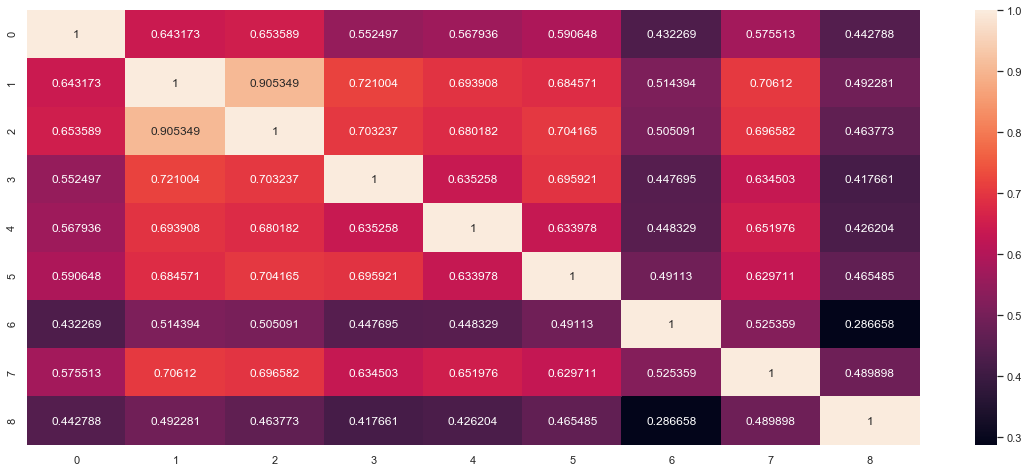

In [49]:
fig, ax = plt.subplots(figsize=(20,8)) 

sns.heatmap(covMatrix, annot=True, fmt='g')
 
plt.show()

# Q7 Identify eigen values and eigen vector

In [50]:
# Step 2- Get eigen values and eigen vector

In [51]:
#cov_matrix * eigen_vector = eigen_value * Idendity_Matrix(shape of cov_matrix) * eigen_vector cov_matrix should be a square matrix

In [52]:
import scipy.linalg as la

In [53]:
eig_values,eig_vectors = la.eig(covMatrix)

In [54]:
#The function la.eig returns a tuple (eigvals,eigvecs) where eigvals is a 1D NumPy array of complex numbers 
#giving the eigenvalues of ,and eigvecs is a 2D NumPy array with the corresponding eigenvectors in the columns:

In [55]:
#The eigenvalues are:

eig_values

array([5.70095065+0.j, 0.7185921 +0.j, 0.09153806+0.j, 0.61494739+0.j,
       0.47180573+0.j, 0.29087381+0.j, 0.32658794+0.j, 0.38079107+0.j,
       0.40391325+0.j])

In [56]:
#The corresponding eigenvectors are:
eig_vectors

array([[-0.32049565, -0.08269766, -0.02199805,  0.03382802,  0.8951106 ,
         0.14697547,  0.1282683 , -0.20128446, -0.09498643],
       [-0.37816342,  0.02757643, -0.71357647,  0.17860232,  0.00660767,
        -0.04474303, -0.20412297,  0.50500274,  0.12807129],
       [-0.37571901,  0.0520143 ,  0.69192239,  0.20958026,  0.05874176,
        -0.17950595, -0.19691261,  0.50218059,  0.08256119],
       [-0.34445224,  0.06156537,  0.05676997,  0.28848674, -0.32039875,
         0.68988099,  0.20629972, -0.03013522, -0.4111643 ],
       [-0.33937482,  0.03143413,  0.02693885,  0.20230845, -0.15357792,
         0.0829809 , -0.44737219, -0.59075632,  0.51242102],
       [-0.34825335,  0.02024136, -0.07651515,  0.09527567, -0.15468316,
        -0.63712681, -0.00789574, -0.31465479, -0.5783169 ],
       [-0.26727794,  0.58514948,  0.01684411, -0.73401365, -0.01408233,
         0.11879544, -0.16445398,  0.01440889, -0.07442738],
       [-0.34840023,  0.01652831,  0.00160774, -0.10666018, -0

In [57]:
v_0 = eig_vectors[:,0]
v_0

array([-0.32049565, -0.37816342, -0.37571901, -0.34445224, -0.33937482,
       -0.34825335, -0.26727794, -0.34840023, -0.25531737])

In [58]:
np.matmul(covMatrix, v_0)

array([-1.82712986, -2.15589099, -2.14195555, -1.96370525, -1.93475911,
       -1.98537517, -1.52373834, -1.98621254, -1.45555174])

In [59]:
np.matmul(eig_values[0] * np.identity(covMatrix.shape[0]),v_0)

array([-1.82712986+0.j, -2.15589099+0.j, -2.14195555+0.j, -1.96370525+0.j,
       -1.93475911+0.j, -1.98537517+0.j, -1.52373834+0.j, -1.98621254+0.j,
       -1.45555174+0.j])

# Q8 Find variance and cumulative variance by each eigen vector

In [60]:
eig_values

array([5.70095065+0.j, 0.7185921 +0.j, 0.09153806+0.j, 0.61494739+0.j,
       0.47180573+0.j, 0.29087381+0.j, 0.32658794+0.j, 0.38079107+0.j,
       0.40391325+0.j])

In [61]:
sorted(eig_values,reverse = True)

[(5.7009506524475135+0j),
 (0.7185921047432471+0j),
 (0.6149473857529802+0j),
 (0.4718057274618837+0j),
 (0.40391324581739413+0j),
 (0.38079106877622604+0j),
 (0.3265879446835615+0j),
 (0.29087381032442894+0j),
 (0.09153805999276353+0j)]

In [62]:
tot = sum (eig_values)

In [63]:
tot

(8.999999999999998+0j)

In [64]:
var_exp = [(i/tot)*100 for i in sorted(eig_values,reverse = True)]
var_exp

[(63.34389613830572+0j),
 (7.984356719369414+0j),
 (6.832748730588671+0j),
 (5.2422858606875975+0j),
 (4.487924953526602+0j),
 (4.231011875291401+0j),
 (3.6287549409284616+0j),
 (3.2319312258269886+0j),
 (1.0170895554751505+0j)]

In [65]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 63.34389614+0.j,  71.32825286+0.j,  78.16100159+0.j,
        83.40328745+0.j,  87.8912124 +0.j,  92.12222428+0.j,
        95.75097922+0.j,  98.98291044+0.j, 100.        +0.j])

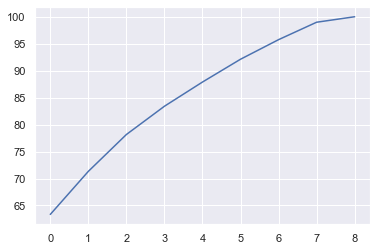

In [66]:
plt.plot(cum_var_exp)

In [67]:
#eig_values.real()
eig_values.real

array([5.70095065, 0.7185921 , 0.09153806, 0.61494739, 0.47180573,
       0.29087381, 0.32658794, 0.38079107, 0.40391325])

##### alternative method 

In [68]:

eig_values, eig_vectors = np.linalg.eig(covMatrix)

In [69]:
sorted(eig_values,reverse = True)

[5.700950652447513,
 0.718592104743247,
 0.6149473857529802,
 0.47180572746188415,
 0.40391324581739413,
 0.3807910687762261,
 0.32658794468356156,
 0.29087381032442966,
 0.09153805999276345]

In [70]:
tot = sum (eig_values)
tot

8.999999999999998

In [71]:
var_exp = [(i/tot)*100 for i in sorted(eig_values,reverse = True)]
var_exp

[63.34389613830571,
 7.984356719369412,
 6.832748730588671,
 5.242285860687603,
 4.487924953526602,
 4.231011875291402,
 3.628754940928462,
 3.231931225826997,
 1.0170895554751496]

In [72]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 63.34389614,  71.32825286,  78.16100159,  83.40328745,
        87.8912124 ,  92.12222428,  95.75097922,  98.98291044,
       100.        ])

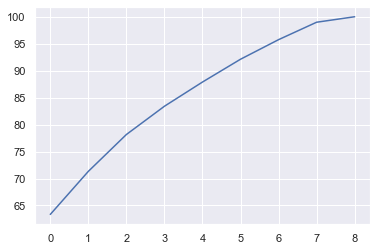

In [73]:
plt.plot(cum_var_exp)

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=7)

In [76]:
data_reduced = pca.fit_transform(BC2)

In [77]:
data_reduced.transpose()

array([[-1.32299584,  2.04944799, -1.45432376, ...,  3.67195785,
         2.48736184,  2.83768827],
       [-0.68849068, -1.03252206, -0.7528388 , ...,  0.99692071,
        -1.11768588, -1.15844628],
       [ 0.98462306, -0.53614491,  0.98229459, ...,  0.5048524 ,
        -0.62680057, -0.79483088],
       ...,
       [-0.09222497, -0.92465632, -0.18474882, ...,  1.27286052,
         0.77102922,  0.66683663],
       [ 0.19951256,  1.08171519,  0.14357601, ..., -1.65785083,
        -0.48295424, -0.73535989],
       [-0.2558527 , -0.10867915, -0.34915833, ..., -0.57129104,
         0.30811326,  0.17282116]])

In [78]:
pca.components_

array([[ 0.32049565,  0.37816342,  0.37571901,  0.34445224,  0.33937482,
         0.34825335,  0.26727794,  0.34840023,  0.25531737],
       [ 0.08269766, -0.02757643, -0.0520143 , -0.06156537, -0.03143413,
        -0.02024136, -0.58514948, -0.01652831,  0.80114539],
       [-0.03382802, -0.17860232, -0.20958026, -0.28848674, -0.20230845,
        -0.09527567,  0.73401365,  0.10666018,  0.4895404 ],
       [-0.8951106 , -0.00660767, -0.05874176,  0.32039875,  0.15357792,
         0.15468316,  0.01408233,  0.1620881 ,  0.13654112],
       [-0.09498643,  0.12807129,  0.08256119, -0.4111643 ,  0.51242102,
        -0.5783169 , -0.07442738,  0.43983273, -0.05181591],
       [ 0.20128446, -0.50500274, -0.50218059,  0.03013522,  0.59075632,
         0.31465479, -0.01440889,  0.03042538, -0.04721582],
       [ 0.1282683 , -0.20412297, -0.19691261,  0.20629972, -0.44737219,
        -0.00789574, -0.16445398,  0.78358428, -0.13890018]])

In [79]:
v_0 = eig_vectors[:,0]
v_0

array([-0.32049565, -0.37816342, -0.37571901, -0.34445224, -0.33937482,
       -0.34825335, -0.26727794, -0.34840023, -0.25531737])

In [80]:
pca.explained_variance_

array([5.70922489, 0.71963505, 0.61583991, 0.4724905 , 0.40449948,
       0.38134374, 0.32706195])

In [81]:
eig_values

array([5.70095065, 0.7185921 , 0.09153806, 0.61494739, 0.47180573,
       0.29087381, 0.32658794, 0.38079107, 0.40391325])

# Q10 Find correlation between components and features

In [82]:
df_comp = pd.DataFrame(pca.components_, columns = list(BC2))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.320496,0.378163,0.375719,0.344452,0.339375,0.348253,0.267278,0.348400,0.255317
1,0.082698,-0.027576,-0.052014,-0.061565,-0.031434,-0.020241,-0.585149,-0.016528,0.801145
2,-0.033828,-0.178602,-0.209580,-0.288487,-0.202308,-0.095276,0.734014,0.106660,0.489540
3,-0.895111,-0.006608,-0.058742,0.320399,0.153578,0.154683,0.014082,0.162088,0.136541
4,-0.094986,0.128071,0.082561,-0.411164,0.512421,-0.578317,-0.074427,0.439833,-0.051816
5,0.201284,-0.505003,-0.502181,0.030135,0.590756,0.314655,-0.014409,0.030425,-0.047216
6,0.128268,-0.204123,-0.196913,0.206300,-0.447372,-0.007896,-0.164454,0.783584,-0.138900


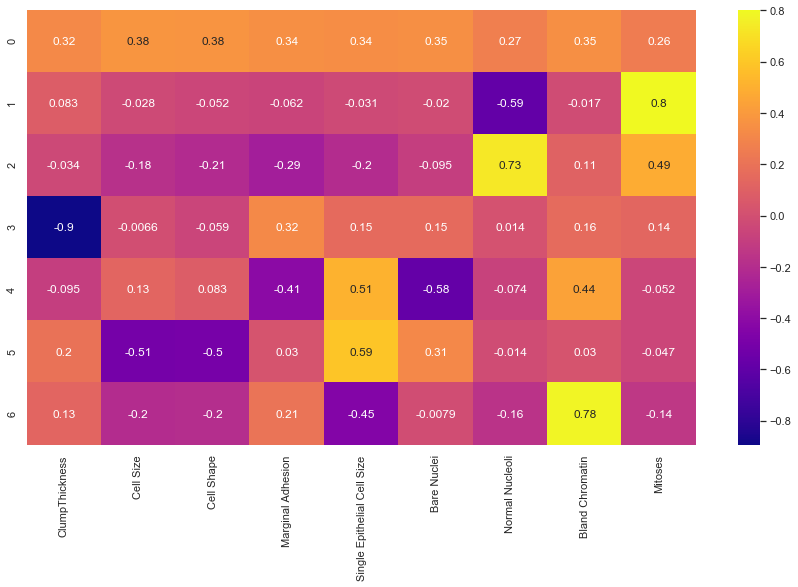

In [83]:
plt.figure(figsize = (15,8))
#sns.heatmap(df_comp, annot=True, fmt='g')
sns.heatmap(df_comp, cmap='plasma',annot = True)
plt.show()

##### From the above heatmap we can see we any positive change will occur in component 3 it will cause in negative change in ClumpThikness as both are negatively correalted. Also any positive change in component 2 will cause positive change in Normal Nucleoli column. and same changes can be seen for component 6 and column Bland Chromatin.